# Model Training

## 1. Import Data and Required Packages

Importing `pandas`, `numpy`, `matplotlib`, `seaborn` and `warings` Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## 2. Import the Data

Let's import the data and explore the first few rows as well as the number of records.

In [2]:
df = pd.read_csv("data/stud.csv", index_col=False)

# Shape of dataframe
print("df.shape:", df.shape)
# Show first 5 records
df.head()

df.shape: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Preparing `X` and `Y` variables

We're going to select the `math_score` as the dependent variable.

In [3]:
X = df.drop(columns=["math_score"], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
dtypes = df.dtypes.to_dict()

for feature in df.columns:
    if dtypes[feature] == "object":
        print(f"Categories in {feature} variable: {np.unique(df[feature])}", end="\n\n")

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group A' 'group B' 'group C' 'group D' 'group E']

Categories in parental_level_of_education variable: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']

Categories in lunch variable: ['free/reduced' 'standard']

Categories in test_preparation_course variable: ['completed' 'none']



In [5]:
y = df["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [7]:
X = preprocessor.fit_transform(X)
print("X.shape:", X.shape)

X.shape: (1000, 19)


In [8]:
from sklearn.model_selection import train_test_split


# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (800, 19)
X_test.shape: (200, 19)


### 3.1 Create an Evaluate Function

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

In [11]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" * 35)
    print("\n")

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.3257
- Mean Absolute Error: 4.2695
- R2 Score: 0.8742
----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.4212
- Mean Absolute Error: 4.2347
- R2 Score: 0.8792


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-----------------------

## 4. Results

In [12]:
pd.DataFrame(
    list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]
).sort_values(by=["R2_Score"], ascending=False).reset_index(drop=True)

,Model Name,R2_Score
0,Ridge,0.880593
1,Linear Regression,0.879226
2,CatBoosting Regressor,0.851632
3,Random Forest Regressor,0.851331
4,AdaBoost Regressor,0.847583
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.741101


### 4.1 Linear Regression

In [13]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is: %.2f" % score)

Accuracy of the model is: 87.92


#### 4.1.1 Plot `y_pred` and `y_test`

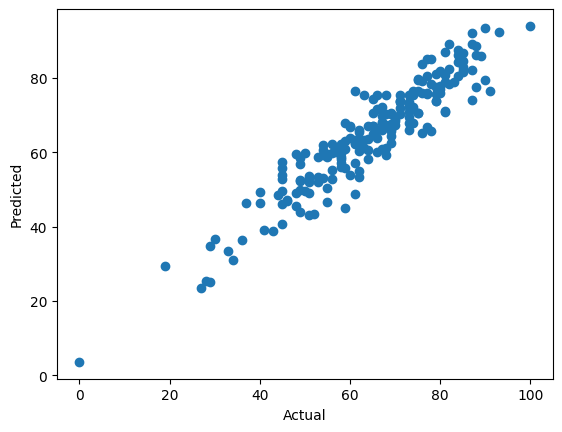

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

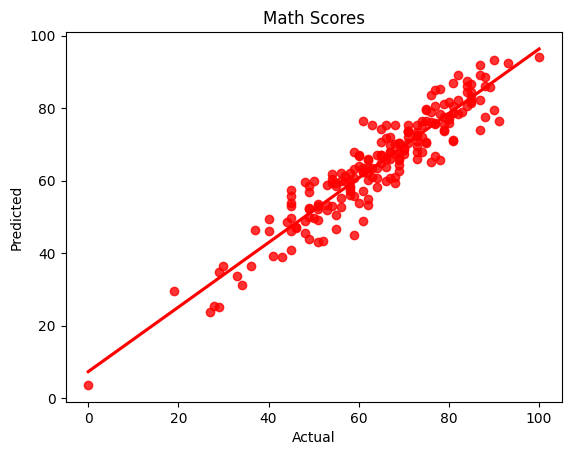

In [15]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Math Scores")
plt.show()

#### 4.1.2 Difference between Actual and Predicted Values

In [16]:
pred_df = pd.DataFrame(
    {"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred}
)
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
